# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
data = pd.DataFrame()
data["reviews"] = reviews
data.head()

,reviews
0,✅ Trip Verified | Stinking nappies being chang...
1,✅ Trip Verified | Worst service ever. Lost bag...
2,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
3,✅ Trip Verified | Not a great experience. I co...
4,Not Verified | I was excited to fly BA as I'd ...


In [4]:
data.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

## Loading dataset 

In [5]:
data = pd.read_csv("BA_reviews.csv")
data

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Stinking nappies being chang...
1,1,✅ Trip Verified | Worst service ever. Lost bag...
2,2,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
3,3,✅ Trip Verified | Not a great experience. I co...
4,4,Not Verified | I was excited to fly BA as I'd ...
...,...,...
995,995,✅ Trip Verified | London to Johannesburg. Sin...
996,996,✅ Trip Verified | Doha to London Heathrow. Fl...
997,997,✅ Trip Verified | Miami to Tel Aviv via Londo...
998,998,✅ Trip Verified | London to Seoul. I normally...


In [6]:
#printing the first five rows of the dataset
data.head()

,Unnamed: 0,reviews
0,0,✅ Trip Verified | Stinking nappies being chang...
1,1,✅ Trip Verified | Worst service ever. Lost bag...
2,2,✅ Trip Verified | BA 246 21JAN 2023 Did not a...
3,3,✅ Trip Verified | Not a great experience. I co...
4,4,Not Verified | I was excited to fly BA as I'd ...


In [7]:
#printing the last five rows of the dataset
data.tail()

,Unnamed: 0,reviews
995,995,✅ Trip Verified | London to Johannesburg. Sin...
996,996,✅ Trip Verified | Doha to London Heathrow. Fl...
997,997,✅ Trip Verified | Miami to Tel Aviv via Londo...
998,998,✅ Trip Verified | London to Seoul. I normally...
999,999,✅ Trip Verified | London Heathrow to New York...


In [8]:
#getting information about our data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [9]:
#number of rows and columns in data
data.shape

(1000, 2)

In [10]:
#printing the length of dataset
len(data)

1000

## Data Cleaning 

In [11]:
import re

# Define a function to clean the text

def clean(text):
# Removes all special characters and numericals leaving the alphabets

    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column

data['Reviews'] = data['reviews'].apply(clean)
data.head()

,Unnamed: 0,reviews,Reviews
0,0,✅ Trip Verified | Stinking nappies being chang...,Trip Verified Stinking nappies being changed ...
1,1,✅ Trip Verified | Worst service ever. Lost bag...,Trip Verified Worst service ever Lost baggage...
2,2,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN Did not appreciate the u...
3,3,✅ Trip Verified | Not a great experience. I co...,Trip Verified Not a great experience I could ...
4,4,Not Verified | I was excited to fly BA as I'd ...,Not Verified I was excited to fly BA as I d no...


In [12]:
data

,Unnamed: 0,reviews,Reviews
0,0,✅ Trip Verified | Stinking nappies being chang...,Trip Verified Stinking nappies being changed ...
1,1,✅ Trip Verified | Worst service ever. Lost bag...,Trip Verified Worst service ever Lost baggage...
2,2,✅ Trip Verified | BA 246 21JAN 2023 Did not a...,Trip Verified BA JAN Did not appreciate the u...
3,3,✅ Trip Verified | Not a great experience. I co...,Trip Verified Not a great experience I could ...
4,4,Not Verified | I was excited to fly BA as I'd ...,Not Verified I was excited to fly BA as I d no...
...,...,...,...
995,995,✅ Trip Verified | London to Johannesburg. Sin...,Trip Verified London to Johannesburg Since th...
996,996,✅ Trip Verified | Doha to London Heathrow. Fl...,Trip Verified Doha to London Heathrow Flight ...
997,997,✅ Trip Verified | Miami to Tel Aviv via Londo...,Trip Verified Miami to Tel Aviv via London At...
998,998,✅ Trip Verified | London to Seoul. I normally...,Trip Verified London to Seoul I normally fly ...


In [13]:
#droping the previous reviews column
data = data.drop(columns = 'reviews' , axis = 1) 
data

,Unnamed: 0,Reviews
0,0,Trip Verified Stinking nappies being changed ...
1,1,Trip Verified Worst service ever Lost baggage...
2,2,Trip Verified BA JAN Did not appreciate the u...
3,3,Trip Verified Not a great experience I could ...
4,4,Not Verified I was excited to fly BA as I d no...
...,...,...
995,995,Trip Verified London to Johannesburg Since th...
996,996,Trip Verified Doha to London Heathrow Flight ...
997,997,Trip Verified Miami to Tel Aviv via London At...
998,998,Trip Verified London to Seoul I normally fly ...


In [14]:
#replacing the special character with nothing
data.Reviews= data.Reviews.str.split('|',expand=True)

In [15]:
#checking the duplicates
dup = data.duplicated()
print(data[dup])

Empty DataFrame
Columns: [Unnamed: 0, Reviews]
Index: []


In [16]:
data

,Unnamed: 0,Reviews
0,0,Trip Verified Stinking nappies being changed ...
1,1,Trip Verified Worst service ever Lost baggage...
2,2,Trip Verified BA JAN Did not appreciate the u...
3,3,Trip Verified Not a great experience I could ...
4,4,Not Verified I was excited to fly BA as I d no...
...,...,...
995,995,Trip Verified London to Johannesburg Since th...
996,996,Trip Verified Doha to London Heathrow Flight ...
997,997,Trip Verified Miami to Tel Aviv via London At...
998,998,Trip Verified London to Seoul I normally fly ...


In [17]:
#function to remove punctuations
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation , '')
    return text    

In [18]:
data = data.apply(remove_punctuations)
data

,Unnamed: 0,Reviews
0,0,Trip Verified Stinking nappies being changed ...
1,1,Trip Verified Worst service ever Lost baggage...
2,2,Trip Verified BA JAN Did not appreciate the u...
3,3,Trip Verified Not a great experience I could ...
4,4,Not Verified I was excited to fly BA as I d no...
...,...,...
995,995,Trip Verified London to Johannesburg Since th...
996,996,Trip Verified Doha to London Heathrow Flight ...
997,997,Trip Verified Miami to Tel Aviv via London At...
998,998,Trip Verified London to Seoul I normally fly ...


In [19]:
#replacing the 'Trip Verified' with nothing
data['Reviews'] = data['Reviews'].str.replace('Trip Verified' , '')
data

,Unnamed: 0,Reviews
0,0,Stinking nappies being changed in business c...
1,1,Worst service ever Lost baggage because of d...
2,2,BA JAN Did not appreciate the unprofessional...
3,3,Not a great experience I could not check in ...
4,4,Not Verified I was excited to fly BA as I d no...
...,...,...
995,995,London to Johannesburg Since the aircraft wa...
996,996,Doha to London Heathrow Flight on time not c...
997,997,Miami to Tel Aviv via London At Miami airpor...
998,998,London to Seoul I normally fly business but ...


In [20]:
#importing some important libraries
import nltk

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [21]:
# performing Tokenization , POS tagging , Stopwords removal and Obtaining the Stem Words 
pos_dict = {'A':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}

def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    
    new_list = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
            new_list.append(tuple([word, pos_dict.get(tag[0])]))
    return new_list


In [22]:
data['POS Tagged'] = data['Reviews'].apply(token_stop_pos)
data.head()

,Unnamed: 0,Reviews,POS Tagged
0,0,Stinking nappies being changed in business c...,"[(Stinking, v), (nappies, n), (changed, v), (b..."
1,1,Worst service ever Lost baggage because of d...,"[(Worst, n), (service, n), (ever, r), (Lost, v..."
2,2,BA JAN Did not appreciate the unprofessional...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes..."
3,3,Not a great experience I could not check in ...,"[(great, None), (experience, n), (could, None)..."
4,4,Not Verified I was excited to fly BA as I d no...,"[(Verified, n), (excited, v), (fly, v), (BA, n..."


In [24]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

data['Lemma'] = data['POS Tagged'].apply(lemmatize)
data.head()

,Unnamed: 0,Reviews,POS Tagged,Lemma
0,0,Stinking nappies being changed in business c...,"[(Stinking, v), (nappies, n), (changed, v), (b...",Stinking nappy change business cabin through...
1,1,Worst service ever Lost baggage because of d...,"[(Worst, n), (service, n), (ever, r), (Lost, v...",Worst service ever Lost baggage delayed flig...
2,2,BA JAN Did not appreciate the unprofessional...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes...",BA JAN appreciate unprofessional attitude pi...
3,3,Not a great experience I could not check in ...,"[(great, None), (experience, n), (could, None)...",great experience could check online two sepa...
4,4,Not Verified I was excited to fly BA as I d no...,"[(Verified, n), (excited, v), (fly, v), (BA, n...",Verified excite fly BA travel long haul yr t...


In [25]:
data[['Reviews','Lemma']]

,Reviews,Lemma
0,Stinking nappies being changed in business c...,Stinking nappy change business cabin through...
1,Worst service ever Lost baggage because of d...,Worst service ever Lost baggage delayed flig...
2,BA JAN Did not appreciate the unprofessional...,BA JAN appreciate unprofessional attitude pi...
3,Not a great experience I could not check in ...,great experience could check online two sepa...
4,Not Verified I was excited to fly BA as I d no...,Verified excite fly BA travel long haul yr t...
...,...,...
995,London to Johannesburg Since the aircraft wa...,London Johannesburg Since aircraft half full...
996,Doha to London Heathrow Flight on time not c...,Doha London Heathrow Flight time completely ...
997,Miami to Tel Aviv via London At Miami airpor...,Miami Tel Aviv via London Miami airport Octo...
998,London to Seoul I normally fly business but ...,London Seoul normally fly business last minu...


## Sentiment Analysis using VADER 

In [26]:
!pip install vaderSentiment

Defaulting to user installation because normal site-packages is not writeable


In [27]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment

def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

data['Sentiment'] = data['Lemma'].apply(vadersentimentanalysis)

# function to analyse

def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
data['Analysis'] = data['Sentiment'].apply(vader_analysis)
data.head()

,Unnamed: 0,Reviews,POS Tagged,Lemma,Sentiment,Analysis
0,0,Stinking nappies being changed in business c...,"[(Stinking, v), (nappies, n), (changed, v), (b...",Stinking nappy change business cabin through...,0.8115,Positive
1,1,Worst service ever Lost baggage because of d...,"[(Worst, n), (service, n), (ever, r), (Lost, v...",Worst service ever Lost baggage delayed flig...,-0.9001,Negative
2,2,BA JAN Did not appreciate the unprofessional...,"[(BA, n), (JAN, n), (appreciate, v), (unprofes...",BA JAN appreciate unprofessional attitude pi...,0.2960,Neutral
3,3,Not a great experience I could not check in ...,"[(great, None), (experience, n), (could, None)...",great experience could check online two sepa...,0.9538,Positive
4,4,Not Verified I was excited to fly BA as I d no...,"[(Verified, n), (excited, v), (fly, v), (BA, n...",Verified excite fly BA travel long haul yr t...,0.7506,Positive


In [28]:
v_counts = data['Analysis'].value_counts()
v_counts

Positive    479
Negative    415
Neutral     106
Name: Analysis, dtype: int64

## Data Visualization 

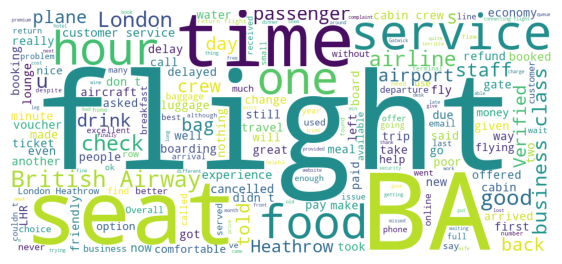

In [34]:
review_word = []

from nltk.corpus import stopwords
from wordcloud import WordCloud

for i in data['Reviews'] :
    a = i.split(' ')
    for x in a:
        review_word.append(x)
        
unique_string = (" ").join(review_word)

wc = WordCloud(width = 1000, height = 450, background_color = 'white').generate(unique_string)
plt.figure(figsize=(7,5))
plt.imshow(wc)
plt.axis("off")
plt.show()


([<matplotlib.patches.Wedge at 0x206de0bbc10>,
 [Text(0.07251815034740818, 1.0976069960920398, 'Positive'),
  Text(-0.42732883420094653, -1.013602519462368, 'Negative'),
  Text(1.2758351325693755, -0.44129889474332934, 'Neutral')],
 [Text(0.039555354734949914, 0.5986947251411125, '47.9%'),
  Text(-0.23308845501869807, -0.5528741015249279, '41.5%'),
  Text(0.8033036019881252, -0.2778548596532074, '10.6%')])

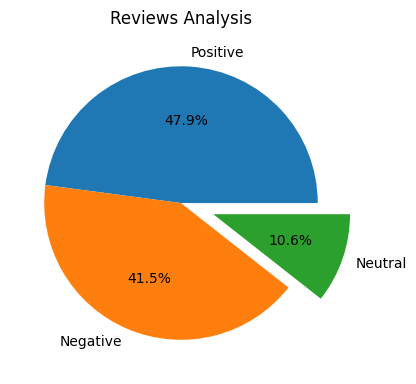

In [31]:
%matplotlib inline
plt.figure(figsize=(15,7))

plt.subplot(1,3,2)
plt.title("Reviews Analysis")
plt.pie(v_counts.values, labels = v_counts.index, explode = (0, 0, 0.25), autopct='%1.1f%%', shadow=False)